# Desikan Atlas

The Desikan parcellation is a cortical atlas with 68 regions, evenly spread across the left and right hemispheres [1]. It was originally developed as a surface atlas, and is made available through Freesurfer. However, when performing volumetric analysis, such a surface atlas is not useable. To remedy this, we have converted the Desikan parcellation to a surface atlas. We have also added two regions - region numbers 1 and 36, which fill the white matter space near the corpus collosum in each hemisphere.

[1]: http://www.sciencedirect.com/science/article/pii/S1053811906000437

# Purpose of this notebook

The Desikan volumetric atlas was created several years ago, and as tools and pipelines have since changed, oversights in how this conversion process was performed have been detected. As such, there have been several iterations of trying to correct this atlas, some appearing successful in some ways but not in others, and now many copies exist with different properties. This notebook will investigate all known copies of the Desikan volumetric atlas, and evaluate which copy of the atlas - whether existing prior to this notebook or not - should be used in future.

## Step 1: Get summary information

### Step 1.1: Load template & atlases

In [1]:
# Set list of filenames
MNI152_fname = './data/MNI152/MNI152_T1_1mm_brain_mask.nii.gz'
desikan_fnames = ['./data/desikan_labels/brainstore_MR_atlases/parcellations/desikan.nii.gz',
                  './data/desikan_labels/brainstore_MR_atlases/parcellations/ingested/desikan.nii.gz',
                  './data/desikan_labels/brainstore_MR_atlases/parcellations/raw/desikan.nii.gz',
                  './data/desikan_labels/brainstore_MR_atlases/parcellations/raw/desikan_correct.nii.gz',
                  './data/desikan_labels/brainstore_mrocp_data_share_atlases/labels/desikan.nii.gz']

# Load images
import nibabel as nb
MNI152 = nb.load(MNI152_fname)
desikans = {idx+1:nb.load(fnames) for idx, fnames in enumerate(desikan_fnames)}

# Print reference info
print("desikans")
print("  "+"\n  ".join([str(idx+1)+': '+fnames for idx, fnames in enumerate(desikan_fnames)]))

desikans
  1: ./data/desikan_labels/brainstore_MR_atlases/parcellations/desikan.nii.gz
  2: ./data/desikan_labels/brainstore_MR_atlases/parcellations/ingested/desikan.nii.gz
  3: ./data/desikan_labels/brainstore_MR_atlases/parcellations/raw/desikan.nii.gz
  4: ./data/desikan_labels/brainstore_MR_atlases/parcellations/raw/desikan_correct.nii.gz
  5: ./data/desikan_labels/brainstore_mrocp_data_share_atlases/labels/desikan.nii.gz


### Step 1.2: Get basic info about atlases

In [36]:
ims = {ky:desikans[ky].get_data() for ky in desikans.keys()}
# Get atlas shapes

shapes = {ky:ims[ky].shape for ky in ims.keys()}
print("shape")
print("  "+"\n  ".join([str(ky)+': '+str(shapes[ky]) for ky in shapes.keys()]))


import numpy as np

# Get number of atlas regions (- background)
nrois = {ky:len(np.unique(ims[ky]))-1 for ky in ims.keys()}
print("\nnrois")
print("  "+"\n  ".join([str(ky)+': '+str(nrois[ky]) for ky in nrois.keys()]))

# Get range of ROI values
roi_range = {ky:np.max(ims[ky])-np.min(ims[ky]) for ky in ims.keys()}
print("\nroi_range")
print("  "+"\n  ".join([str(ky)+': '+str(roi_range[ky]) for ky in roi_range.keys()]))

# Get ROI value datatypes
dtypes = {ky:ims[ky].dtype for ky in ims.keys()}
print("\nroi_range")
print("  "+"\n  ".join([str(ky)+': '+str(dtypes[ky]) for ky in dtypes.keys()]))

shape
  1: (182, 218, 182)
  2: (182, 218, 182)
  3: (182, 218, 182)
  4: (182, 218, 182)
  5: (182, 218, 182)

nrois
  1: 70
  2: 70
  3: 70
  4: 70
  5: 70

roi_range
  1: 1174405120
  2: 70
  3: 135
  4: 135
  5: 135

roi_range
  1: int32
  2: >i4
  3: >i4
  4: >i4
  5: >i4


### Step 1.3:  Get affine transforms

In [3]:
print("\nMNI152 Affine")
print(MNI152.get_affine())

affines = {ky:desikans[ky].get_affine() for ky in desikans.keys()}
print("\naffines")
for idx, val in enumerate(affines.values()):
    print(str(idx+1)+":\n"),
    print(val)


MNI152 Affine
[[ -1.   0.   0.  90.]
 [  0.  -1.   0.  91.]
 [  0.   0.   1. -72.]
 [  0.   0.   0.   1.]]

affines
1:
[[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
2:
[[ -1.   0.   0.  90.]
 [  0.  -1.   0.  91.]
 [  0.   0.   1. -72.]
 [  0.   0.   0.   1.]]
3:
[[ -1.   0.   0.  90.]
 [  0.  -1.   0.  91.]
 [  0.   0.   1. -72.]
 [  0.   0.   0.   1.]]
4:
[[ -1.   0.   0.  90.]
 [  0.  -1.   0.  91.]
 [  0.   0.   1. -72.]
 [  0.   0.   0.   1.]]
5:
[[ -1.   0.   0.  90.]
 [  0.  -1.   0.  91.]
 [  0.   0.   1. -72.]
 [  0.   0.   0.   1.]]


### Step 1.4: Evaluate overlap with template

In [31]:
MNI152_im = MNI152.get_data()
# np.linalg.norm(MNI152_im, )
for ky in ims:
    im = ims[ky]
    im = im > 0
    print(str(ky)+': '+str(np.sum(np.abs(MNI152_im - im))))

1: 47726083
2: 92163
3: 92163
4: 92163
5: 92163


### Early signs....

- **`1`** is an attempt to normalize this atlas unsuccessfully/align it in image space, but broke the alignment in voxel space
- **`2`** alignment in both image in voxel space appears good, with relabeling of region labels 101-135 to 36-70 having occured.
- **`3-5`** are the same as one another, with the true region labels, and align in both image and voxel space.

**`2`** might be our winner so far....

## Step 2: Generate graphs

### Step 2.1: Load fibers

In [35]:
fibs_fname = './data/fibers/MRN114_M87102217_1_DTI_fibers.npz'
fibs_file = np.load(fibs_fname)
fibs = fibs_file[fibs_file.keys()[0]]

### Step 2.2: Build graph for each atlas

In [52]:
from ndmg import graph as mgg

g = {}
for idx, ky in enumerate(desikans):
    tmp_g = mgg(nrois[ky], desikan_fnames[idx], attr={'desikan': ky})
    tmp_g.make_graph(fibs)
    tmp_g.summary()
    g[ky] = tmp_g

{'ecount': 0, 'vcount': 70, 'region': 'brain', 'source': 'http://m2g.io', 'version': '0.0.41-2', 'date': 'Thu Jan 26 09:01:45 2017', 'sensor': 'Diffusion MRI', 'name': "Generated by NeuroData's MRI Graphs (ndmg)"}
# of Streamlines: 786226
0
39311
78622
117933
157244
196555
235866
275177
314488
353799
393110
432421
471732
511043
550354
589665
628976
668287
707598
746909
786220

 Graph Summary:
Name: Generated by NeuroData's MRI Graphs (ndmg)
Type: Graph
Number of nodes: 70
Number of edges: 1052
Average degree:  30.0571
{'ecount': 0, 'vcount': 70, 'region': 'brain', 'source': 'http://m2g.io', 'version': '0.0.41-2', 'date': 'Thu Jan 26 09:02:51 2017', 'sensor': 'Diffusion MRI', 'name': "Generated by NeuroData's MRI Graphs (ndmg)"}
# of Streamlines: 786226
0
39311
78622
117933
157244
196555
235866
275177
314488
353799
393110
432421
471732
511043
550354
589665
628976
668287
707598
746909
786220

 Graph Summary:
Name: Generated by NeuroData's MRI Graphs (ndmg)
Type: Graph
Number of nodes: 70

## Step 2.3: Visualize graphs

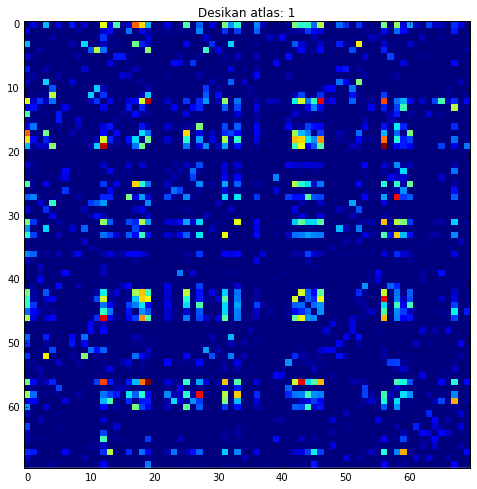

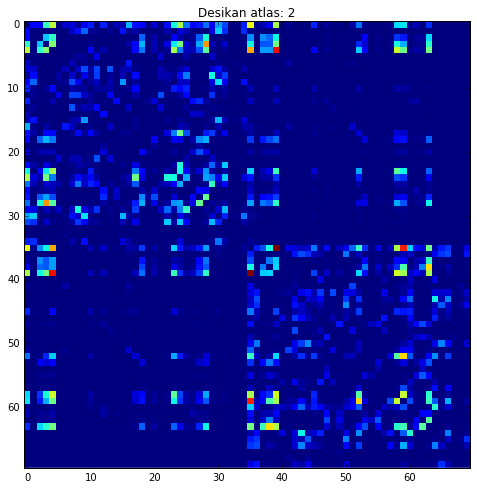

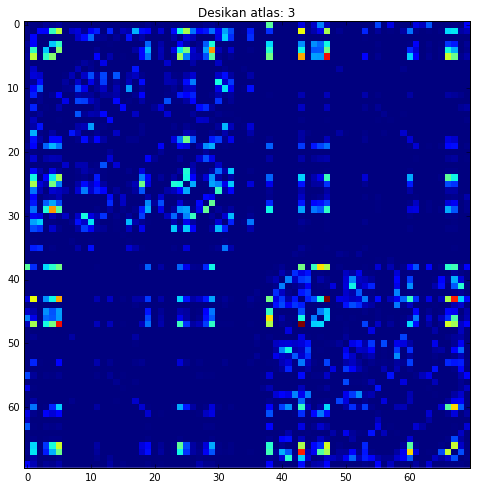

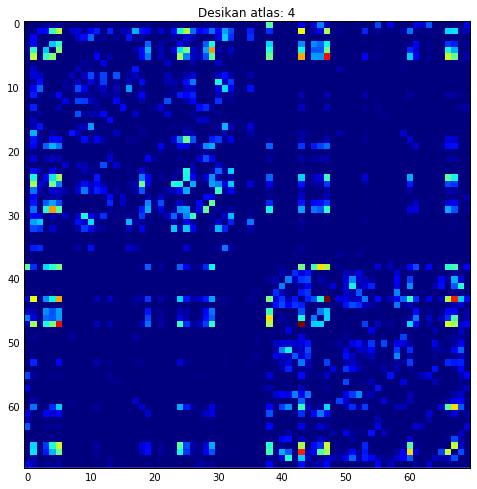

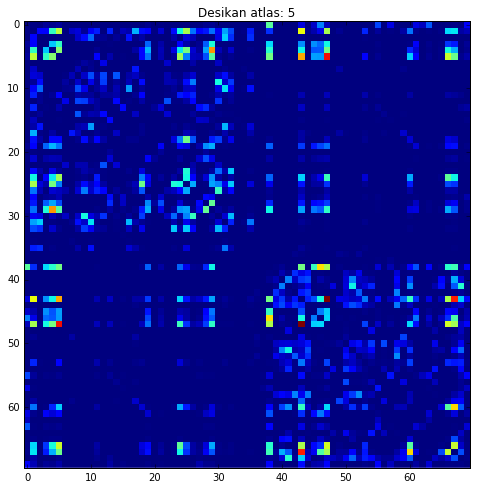

In [64]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

for ky in g:
    plt.figure(figsize=(8,8))
    adj = nx.adj_matrix(g[ky].get_graph()).todense()
    plt.imshow(adj, interpolation='none')
    plt.title('Desikan atlas: '+str(ky))

## WHAT WE LEARNED

use desikan atlas number 2, available at [this url](https://github.com/neurodata/desikan/blob/master/data/desikan_labels/brainstore_MR_atlases/parcellations/ingested/desikan.nii.gz).

## Step 3: Develop QC to avoid this problem in the future

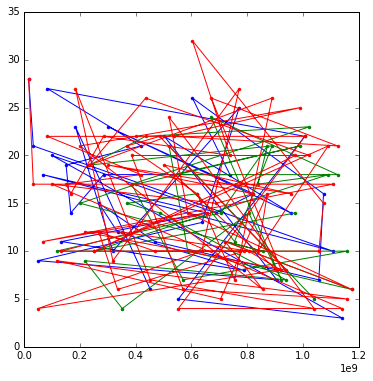

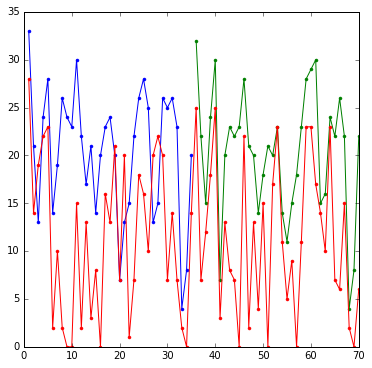

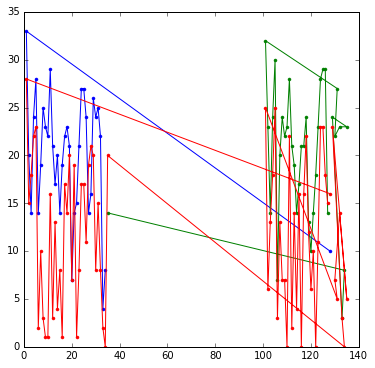

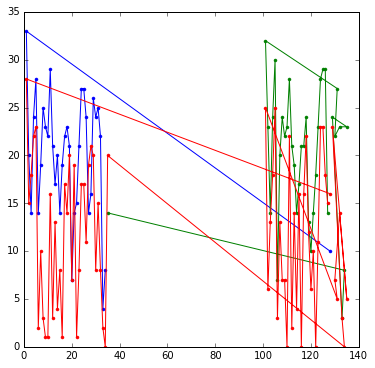

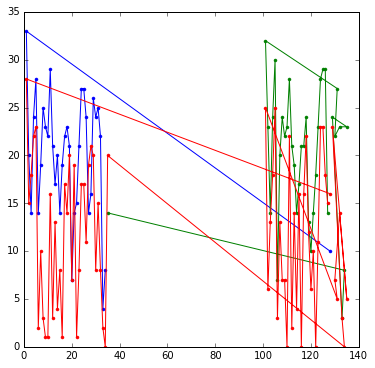

In [137]:
# track Left-Left connectivity, Right-Right, and Left-Right. Observe degree sequence for each node.

for ky in g:
    graph = g[ky].get_graph()
    N = len(graph.nodes())
    LLnodes = graph.nodes()[0:N/2]
    LL = graph.subgraph(LLnodes)
    LLdegs = [LL.degree()[n] for n in LLnodes]

    RRnodes = graph.nodes()[N/2:N]
    RR = graph.subgraph(RRnodes)
    RRdegs = [RR.degree()[n] for n in RRnodes]

    LRnodes = graph.nodes()
    tmp = LLdegs + RRdegs
    degs = [graph.degree()[n] for n in LRnodes]
    LRdegs = [a_i - b_i for a_i, b_i in zip(degs, tmp)]

    plt.figure(figsize=(6,6))
    plt.plot(LLnodes, LLdegs, 'b.-')
    plt.hold(True)
    plt.plot(RRnodes, RRdegs, 'g.-')
    plt.plot(LRnodes, LRdegs, 'r.-')
